# Лабораторная работа №3

## Применение многослойной нейронной сети для классификации данных

> <span style="font-style:normal; font-size:12pt;"> 
    <p> Цель работы: изучение математической модели многослойной нейронной сети и решение с её помощью задачи классификации данных.
    </p>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import keras.backend as K

# import keras.models as M
# import keras.layers as L

# from sklearn.metrics import accuracy_score

## Исследование данных

In [2]:
df = pd.read_csv("data_lab3v03.csv", names=['x1', 'x2', 'y'])

In [3]:
print("Датасет")
print(df.shape)             # посмотреть размерность
print(df.columns)           # посмотреть названия колонок

Датасет
(650, 3)
Index(['x1', 'x2', 'y'], dtype='object')


In [4]:
df['y'].unique()

array([-1,  1], dtype=int64)

In [5]:
df.isna().sum()  # нет пропусков в данных

x1    0
x2    0
y     0
dtype: int64

In [6]:
df['y'].value_counts() # считает количество каждого уникального значения

-1    400
 1    250
Name: y, dtype: int64

In [7]:
x1_plot_cl1 = df.loc[df['y'] == 1, ['x1']]
x2_plot_cl1 = df.loc[df['y'] == 1, ['x2']]

x1_plot_cl2 = df.loc[df['y'] == -1, ['x1']]
x2_plot_cl2 = df.loc[df['y'] == -1, ['x2']]

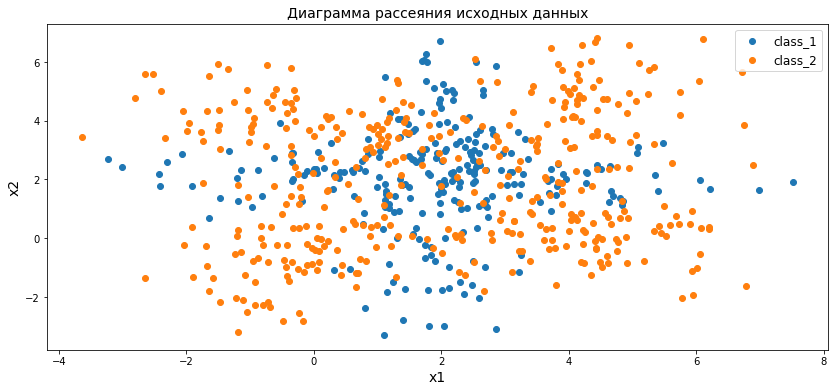

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.scatter(x1_plot_cl1, x2_plot_cl1, lw = 1, label='class_1')
ax.scatter(x1_plot_cl2, x2_plot_cl2, lw = 1, label='class_2')

ax.set_xlabel('x1', fontsize=14)
ax.set_ylabel('x2', fontsize=14)
ax.set_title('Диаграмма рассеяния исходных данных', fontsize=14)

plt.legend(fontsize=12)

plt.savefig(f"./Graphs/Scatterplot.jpg")

plt.show()

## Подготовка данных

После того как мы исследовали наши данные, их необходимо подготовить для алгоритмов машинного обучения.

1. Сбалансировать классы, если это необходимо
2. Масштабирование признаков
2. Создать наборы для обучения и для тестирования
3. Выделить вектор признаков и вектор ответов (целевой переменной)

In [9]:
X = df[['x1', 'x2']]
Y = df['y']

<!-- X = df[['x1', 'x2']]
Y = df['y']
samples_count = X.shape[0] -->

<!-- # валидационная доля от тренеровачных данных
val_part = (samples_count * 0.3 ) / (samples_count * 0.9)
val_part -->

<!-- x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val   = train_test_split(x_train, y_train, test_size=val_part) -->

<!-- print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts()) -->

<!-- # fig, ax = plt.subplots(figsize=(14, 6))

# ax.scatter(x_train['x1'], x_train['x2'], lw = 1, label='train')
# ax.scatter(x_val['x1'], x_val['x2'], lw = 1, label='val')
# ax.scatter(x_test['x1'], x_test['x2'], lw = 1, label='test')

# ax.set_xlabel('x1', fontsize=14)
# ax.set_ylabel('x2', fontsize=14)
# # ax.set_title('Диаграмма рассеяния исходных данных', fontsize=14)

# plt.legend(fontsize=12)

# # plt.savefig(f"./Graphs/Scatterplot.jpg")

# plt.show() -->

### 1. Балансировка

<!-- X = df[['x1','x2']]
X.drop('x2', axis=1) -->

<!-- from imblearn.over_sampling import SMOTE

# создадим модель SMOTE указав кол-во соседей 3 (больше нет смысла, у нас всего 5 экземпляров одного класса)
os = SMOTE(random_state=0, k_neighbors=3)

# вектор признаков
X_ = train_full.drop(['Onshore/Offshore'], axis=1) 
# вектор целевой переменной
y_train_full = train_full['Onshore/Offshore']

column = X_train_full.columns

print("До балансировки")
print(X_train_full.shape)
print(y_train_full.value_counts())


# Применим алгоритм балансировки
os_data_X, os_data_y = os.fit_resample(X_train_full, y_train_full)
os_data_X = pd.DataFrame(data=os_data_X, columns=column)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Onshore/Offshore'])

print('_'*100)
print("После балансировки")
print(os_data_X.shape)
print(os_data_y.value_counts()) -->

### 2. Масштабирование (предобработка входов)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)

X_norm = scaler.transform(X)

print(X_norm)

[[0.29889536 0.5671624 ]
 [0.2544576  0.1021035 ]
 [0.24689382 0.25925075]
 ...
 [0.37632875 0.22250736]
 [0.50148512 0.51313325]
 [0.5640126  0.81073449]]


### 3. Предобработка выходов

In [11]:
Y = Y.map(lambda y: 0 if y<0 else 1)

### 4. Разделение данных

In [12]:
samples_count = X_norm.shape[0]

In [13]:
# валидационная доля от тренеровачных данных
val_part = (samples_count * 0.3 ) / (samples_count * 0.9)
val_part

0.3333333333333333

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.1)

In [15]:
print('Тренировачная выборка:\n', y_train.value_counts())
print('='*100)
print('Тестовая выборка:\n', y_test.value_counts())

Тренировачная выборка:
 0    361
1    224
Name: y, dtype: int64
Тестовая выборка:
 0    39
1    26
Name: y, dtype: int64


## Многослойная сеть

In [16]:
errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[], 
            'cls_train': [], 'cls_val': [], 'cls_test': []}

In [17]:
# инициализация сети

kernel_initializer = tf.keras.initializers.RandomUniform(minval=-3, maxval=3, seed=None)
bias_initializer   = tf.keras.initializers.RandomUniform(minval=-3, maxval=3, seed=None)


# метод оптимизации
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.05, 
    momentum=0.8, 
    nesterov=True)

<!-- # параметры исследования
outputs1 = []
coefs1   = {'epochs': [], 'hidden': [], 'hidden_bias': [], 'out': [], 'out_bias':[]}
errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]} -->

### 1. Сборка модели

In [18]:
x_train = np.asarray(x_train).astype('float32').reshape((-1, 2))
y_train = to_categorical(y_train, 2)

x_test = np.asarray(x_test).astype('float32').reshape((-1, 2))
y_test = to_categorical(y_test, 2)

In [19]:
# инициализация модели
input1 = layers.Input(shape=(2,))

# скрытые слои
layer1 = layers.Dense(
    10,
    activation='tanh',
    kernel_initializer=kernel_initializer,
    bias_initializer  =bias_initializer)(input1)

layer2 = layers.Dense(
    10,
    activation='tanh',
    kernel_initializer=kernel_initializer,
    bias_initializer  =bias_initializer)(layer1)

# выходной слой
out1 = layers.Dense(
    2,
    activation=tf.keras.activations.softmax,
    kernel_initializer=kernel_initializer,
    bias_initializer  =bias_initializer)(layer2)


# Соберем полную модель сети от входа к выходу
model1 = Model(inputs=input1, outputs=out1)


# Компиляция модели
model1.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.MeanAbsoluteError(),
             tf.keras.metrics.BinaryAccuracy()])

### 2. Обучение модели

In [20]:
val_mae = 1000
epochs = 0

while epochs < 1000 and val_mae > 0.25:
    
    hist1 = model1.fit(x=x_train, y=y_train, 
                      epochs=1, 
                      validation_split= val_part)
    
    epochs += 1
    print('Epoches: ', epochs)
    
    
    errors1['epochs'].append(epochs)
    
    errors1['train']. append(hist1.history['loss'][0])
    errors1['val'].   append(hist1.history['val_loss'][0])
    errors1['test'].  append(model1.evaluate(x_test, y_test, verbose=0)[0])
    
    errors1['cls_train']. append(1 - hist1.history['binary_accuracy'][0])
    errors1['cls_val'].   append(1 - hist1.history['val_binary_accuracy'][0])    
    errors1['cls_test'].  append(1 - model1.evaluate(x_test, y_test, verbose=0)[2])
    
    if hist1.history['val_mean_absolute_error'][0] < val_mae:
        val_mae = hist1.history['val_mean_absolute_error'][0]

13/13 [==============================] - 1s 27ms/step - loss: 1.4596 - mean_absolute_error: 0.4011 - binary_accuracy: 0.6128 - val_loss: 0.8132 - val_mean_absolute_error: 0.4058 - val_binary_accuracy: 0.5744
Epoches:  1
13/13 [==============================] - 0s 5ms/step - loss: 0.7180 - mean_absolute_error: 0.4039 - binary_accuracy: 0.6154 - val_loss: 0.6626 - val_mean_absolute_error: 0.3740 - val_binary_accuracy: 0.6256
Epoches:  2
13/13 [==============================] - 0s 5ms/step - loss: 0.6459 - mean_absolute_error: 0.3857 - binary_accuracy: 0.6564 - val_loss: 0.6263 - val_mean_absolute_error: 0.3725 - val_binary_accuracy: 0.6872
Epoches:  3
13/13 [==============================] - 0s 5ms/step - loss: 0.6251 - mean_absolute_error: 0.3836 - binary_accuracy: 0.6641 - val_loss: 0.6337 - val_mean_absolute_error: 0.4068 - val_binary_accuracy: 0.6359
Epoches:  4
13/13 [==============================] - 0s 5ms/step - loss: 0.6243 - mean_absolute_error: 0.3861 - binary_accuracy: 0.6641

13/13 [==============================] - 0s 5ms/step - loss: 0.5005 - mean_absolute_error: 0.3052 - binary_accuracy: 0.7436 - val_loss: 0.6455 - val_mean_absolute_error: 0.3749 - val_binary_accuracy: 0.6359
Epoches:  75
13/13 [==============================] - 0s 6ms/step - loss: 0.5305 - mean_absolute_error: 0.3137 - binary_accuracy: 0.7385 - val_loss: 0.5641 - val_mean_absolute_error: 0.3294 - val_binary_accuracy: 0.7179
Epoches:  76
13/13 [==============================] - 0s 5ms/step - loss: 0.4912 - mean_absolute_error: 0.2967 - binary_accuracy: 0.7615 - val_loss: 0.5692 - val_mean_absolute_error: 0.3577 - val_binary_accuracy: 0.6256
Epoches:  77
13/13 [==============================] - 0s 5ms/step - loss: 0.4968 - mean_absolute_error: 0.2975 - binary_accuracy: 0.7462 - val_loss: 0.6223 - val_mean_absolute_error: 0.3481 - val_binary_accuracy: 0.6974
Epoches:  78
13/13 [==============================] - 0s 5ms/step - loss: 0.5029 - mean_absolute_error: 0.2902 - binary_accuracy: 0.7

13/13 [==============================] - 0s 6ms/step - loss: 0.4289 - mean_absolute_error: 0.2564 - binary_accuracy: 0.7769 - val_loss: 0.5311 - val_mean_absolute_error: 0.2863 - val_binary_accuracy: 0.7692
Epoches:  149
13/13 [==============================] - 0s 6ms/step - loss: 0.4244 - mean_absolute_error: 0.2475 - binary_accuracy: 0.7974 - val_loss: 0.5374 - val_mean_absolute_error: 0.2895 - val_binary_accuracy: 0.7846
Epoches:  150
13/13 [==============================] - 0s 7ms/step - loss: 0.4222 - mean_absolute_error: 0.2494 - binary_accuracy: 0.7718 - val_loss: 0.5517 - val_mean_absolute_error: 0.2893 - val_binary_accuracy: 0.7436
Epoches:  151
13/13 [==============================] - 0s 6ms/step - loss: 0.4329 - mean_absolute_error: 0.2467 - binary_accuracy: 0.8026 - val_loss: 0.5469 - val_mean_absolute_error: 0.2865 - val_binary_accuracy: 0.7385
Epoches:  152
13/13 [==============================] - 0s 7ms/step - loss: 0.4175 - mean_absolute_error: 0.2397 - binary_accuracy:

13/13 [==============================] - 0s 6ms/step - loss: 0.3865 - mean_absolute_error: 0.2190 - binary_accuracy: 0.8179 - val_loss: 0.5204 - val_mean_absolute_error: 0.2717 - val_binary_accuracy: 0.7641
Epoches:  223
13/13 [==============================] - 0s 5ms/step - loss: 0.4036 - mean_absolute_error: 0.2284 - binary_accuracy: 0.7949 - val_loss: 0.5588 - val_mean_absolute_error: 0.2731 - val_binary_accuracy: 0.7538
Epoches:  224
13/13 [==============================] - 0s 6ms/step - loss: 0.4113 - mean_absolute_error: 0.2184 - binary_accuracy: 0.8077 - val_loss: 0.5537 - val_mean_absolute_error: 0.2987 - val_binary_accuracy: 0.7179
Epoches:  225
13/13 [==============================] - 0s 6ms/step - loss: 0.4055 - mean_absolute_error: 0.2313 - binary_accuracy: 0.7846 - val_loss: 0.5405 - val_mean_absolute_error: 0.2783 - val_binary_accuracy: 0.7436
Epoches:  226
13/13 [==============================] - 0s 5ms/step - loss: 0.3963 - mean_absolute_error: 0.2206 - binary_accuracy:

13/13 [==============================] - 0s 6ms/step - loss: 0.3793 - mean_absolute_error: 0.2148 - binary_accuracy: 0.8051 - val_loss: 0.5254 - val_mean_absolute_error: 0.2823 - val_binary_accuracy: 0.7333
Epoches:  297
13/13 [==============================] - 0s 5ms/step - loss: 0.3956 - mean_absolute_error: 0.2251 - binary_accuracy: 0.7974 - val_loss: 0.5405 - val_mean_absolute_error: 0.2745 - val_binary_accuracy: 0.7487
Epoches:  298
13/13 [==============================] - 0s 5ms/step - loss: 0.3786 - mean_absolute_error: 0.2102 - binary_accuracy: 0.8179 - val_loss: 0.5552 - val_mean_absolute_error: 0.2841 - val_binary_accuracy: 0.7436
Epoches:  299
13/13 [==============================] - 0s 6ms/step - loss: 0.4104 - mean_absolute_error: 0.2268 - binary_accuracy: 0.7923 - val_loss: 0.5729 - val_mean_absolute_error: 0.2790 - val_binary_accuracy: 0.7231
Epoches:  300
13/13 [==============================] - 0s 5ms/step - loss: 0.3837 - mean_absolute_error: 0.2009 - binary_accuracy:

13/13 [==============================] - 0s 6ms/step - loss: 0.3994 - mean_absolute_error: 0.2161 - binary_accuracy: 0.8077 - val_loss: 0.5335 - val_mean_absolute_error: 0.2876 - val_binary_accuracy: 0.7385
Epoches:  371
13/13 [==============================] - 0s 5ms/step - loss: 0.4196 - mean_absolute_error: 0.2302 - binary_accuracy: 0.7769 - val_loss: 0.5170 - val_mean_absolute_error: 0.2634 - val_binary_accuracy: 0.7590
Epoches:  372
13/13 [==============================] - 0s 8ms/step - loss: 0.3690 - mean_absolute_error: 0.2015 - binary_accuracy: 0.8282 - val_loss: 0.5342 - val_mean_absolute_error: 0.2800 - val_binary_accuracy: 0.7590
Epoches:  373
13/13 [==============================] - 0s 6ms/step - loss: 0.3886 - mean_absolute_error: 0.2191 - binary_accuracy: 0.8077 - val_loss: 0.5499 - val_mean_absolute_error: 0.2662 - val_binary_accuracy: 0.7487
Epoches:  374
13/13 [==============================] - 0s 7ms/step - loss: 0.4381 - mean_absolute_error: 0.2380 - binary_accuracy:

13/13 [==============================] - 0s 6ms/step - loss: 0.3902 - mean_absolute_error: 0.2133 - binary_accuracy: 0.8128 - val_loss: 0.5063 - val_mean_absolute_error: 0.2627 - val_binary_accuracy: 0.7692
Epoches:  445
13/13 [==============================] - 0s 5ms/step - loss: 0.3736 - mean_absolute_error: 0.2125 - binary_accuracy: 0.8051 - val_loss: 0.5135 - val_mean_absolute_error: 0.2649 - val_binary_accuracy: 0.7641
Epoches:  446
13/13 [==============================] - 0s 5ms/step - loss: 0.3670 - mean_absolute_error: 0.2073 - binary_accuracy: 0.8103 - val_loss: 0.5661 - val_mean_absolute_error: 0.2791 - val_binary_accuracy: 0.7282
Epoches:  447
13/13 [==============================] - 0s 5ms/step - loss: 0.3975 - mean_absolute_error: 0.2242 - binary_accuracy: 0.7744 - val_loss: 0.5307 - val_mean_absolute_error: 0.2620 - val_binary_accuracy: 0.7538
Epoches:  448
13/13 [==============================] - 0s 5ms/step - loss: 0.3817 - mean_absolute_error: 0.2216 - binary_accuracy:

13/13 [==============================] - 0s 6ms/step - loss: 0.3665 - mean_absolute_error: 0.2050 - binary_accuracy: 0.8359 - val_loss: 0.6030 - val_mean_absolute_error: 0.3026 - val_binary_accuracy: 0.7077
Epoches:  519
13/13 [==============================] - 0s 5ms/step - loss: 0.4279 - mean_absolute_error: 0.2253 - binary_accuracy: 0.7949 - val_loss: 0.5133 - val_mean_absolute_error: 0.2596 - val_binary_accuracy: 0.7538
Epoches:  520
13/13 [==============================] - 0s 6ms/step - loss: 0.3694 - mean_absolute_error: 0.2065 - binary_accuracy: 0.8231 - val_loss: 0.5332 - val_mean_absolute_error: 0.2732 - val_binary_accuracy: 0.7487
Epoches:  521
13/13 [==============================] - 0s 5ms/step - loss: 0.3750 - mean_absolute_error: 0.2118 - binary_accuracy: 0.8256 - val_loss: 0.5109 - val_mean_absolute_error: 0.2636 - val_binary_accuracy: 0.7487
Epoches:  522
13/13 [==============================] - 0s 5ms/step - loss: 0.3707 - mean_absolute_error: 0.2125 - binary_accuracy:

13/13 [==============================] - 0s 6ms/step - loss: 0.3734 - mean_absolute_error: 0.2115 - binary_accuracy: 0.8154 - val_loss: 0.5240 - val_mean_absolute_error: 0.2639 - val_binary_accuracy: 0.7538
Epoches:  593
13/13 [==============================] - 0s 6ms/step - loss: 0.3649 - mean_absolute_error: 0.2064 - binary_accuracy: 0.8077 - val_loss: 0.5200 - val_mean_absolute_error: 0.2750 - val_binary_accuracy: 0.7333
Epoches:  594
13/13 [==============================] - 0s 6ms/step - loss: 0.3775 - mean_absolute_error: 0.2093 - binary_accuracy: 0.8154 - val_loss: 0.5200 - val_mean_absolute_error: 0.2630 - val_binary_accuracy: 0.7487
Epoches:  595
13/13 [==============================] - 0s 6ms/step - loss: 0.3586 - mean_absolute_error: 0.2026 - binary_accuracy: 0.8231 - val_loss: 0.5211 - val_mean_absolute_error: 0.2729 - val_binary_accuracy: 0.7487
Epoches:  596
13/13 [==============================] - 0s 6ms/step - loss: 0.3719 - mean_absolute_error: 0.2112 - binary_accuracy:

13/13 [==============================] - 0s 6ms/step - loss: 0.3821 - mean_absolute_error: 0.2063 - binary_accuracy: 0.8231 - val_loss: 0.5176 - val_mean_absolute_error: 0.2769 - val_binary_accuracy: 0.7692
Epoches:  667
13/13 [==============================] - 0s 6ms/step - loss: 0.3909 - mean_absolute_error: 0.2213 - binary_accuracy: 0.8000 - val_loss: 0.5449 - val_mean_absolute_error: 0.2851 - val_binary_accuracy: 0.7385
Epoches:  668
13/13 [==============================] - 0s 5ms/step - loss: 0.3801 - mean_absolute_error: 0.2136 - binary_accuracy: 0.8154 - val_loss: 0.5248 - val_mean_absolute_error: 0.2737 - val_binary_accuracy: 0.7538
Epoches:  669
13/13 [==============================] - 0s 6ms/step - loss: 0.3773 - mean_absolute_error: 0.2094 - binary_accuracy: 0.8000 - val_loss: 0.5299 - val_mean_absolute_error: 0.2606 - val_binary_accuracy: 0.7333
Epoches:  670
13/13 [==============================] - 0s 6ms/step - loss: 0.3840 - mean_absolute_error: 0.2076 - binary_accuracy:

-3, 3 (момент 0.8)
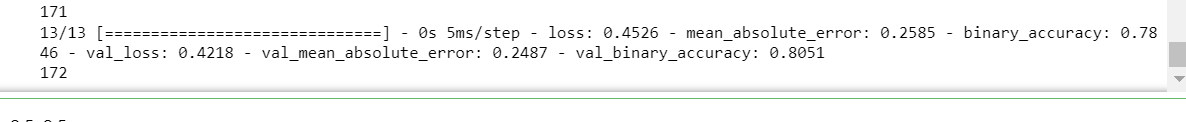

##### Сводка результатов

In [21]:
test_score1 = model1.evaluate(x_test, y_test, verbose=0)

print('train_BCE: {:.4f}'.format(hist1.history['loss'][0]),                      '\n' +
      'train_MAE: {:.4f}'.format(hist1.history['mean_absolute_error'][0]),       '\n' +
      'eps_train: {:.4f}'.format(1 - hist1.history['binary_accuracy'][0]))

print('='*100)

print('val_BCE: {:.4f}'.format(hist1.history['loss'][0]),                        '\n' +
      'val_MAE: {:.4f}'.format(hist1.history['val_mean_absolute_error'][0]),     '\n' + 
      'eps_val:   {:.4f}'.format(1 - hist1.history['val_binary_accuracy'][0]))

print('='*100)
      
print('test_BCE: {:.4f}'.format(hist1.history['loss'][0]),                       '\n' +
      'test_MAE: {:.4f}'.format(test_score1[1]),                                 '\n' +
      'eps_test:  {:.4f}'.format(1 - model1.evaluate(x_test, y_test, verbose=0)[2]))

print('='*100)


print('Accuracy {:.2f}%'.format(test_score1[2] * 100))

train_BCE: 0.3815 
train_MAE: 0.2090 
eps_train: 0.1949
val_BCE: 0.3815 
val_MAE: 0.2464 
eps_val:   0.2154
test_BCE: 0.3815 
test_MAE: 0.2887 
eps_test:  0.2769
Accuracy 72.31%


##### Confusion matrix data

In [22]:
y_train = [np.argmax(y, axis=None, out=None) for y in y_train]

In [23]:
y_predicted_train = model1.predict(x_train)
y_predicted_train = [0 if probs[0] > 0.5 else 1 for probs in y_predicted_train]

In [24]:
y_test = [np.argmax(y, axis=None, out=None) for y in y_test]

In [25]:
y_predicted_test = model1.predict(x_test)
y_predicted_test = [0 if probs[0] > 0.5 else 1 for probs in y_predicted_test]

In [26]:
df1 = pd.DataFrame({'y_train': y_train, 'y_predicted_train': y_predicted_train})
df2 = pd.DataFrame({'y_test':  y_test,  'y_predicted_test':  y_predicted_test})

In [27]:
print('Train data counts: \n', df1['y_train'].value_counts())

print('='*100)

print('Test  data counts: \n',  df2['y_test'].value_counts())

Train data counts: 
 0    361
1    224
Name: y_train, dtype: int64
Test  data counts: 
 0    39
1    26
Name: y_test, dtype: int64


In [28]:
print('True predicted  (train)\n', 
      df1.loc[df1['y_train'] == df1['y_predicted_train'], ['y_predicted_train']].value_counts())

print('='*100)

print('False predicted (train)\n', 
      df1.loc[df1['y_train'] != df1['y_predicted_train'], ['y_predicted_train']].value_counts())

True predicted  (train)
 y_predicted_train
0                    281
1                    183
dtype: int64
False predicted (train)
 y_predicted_train
1                    80
0                    41
dtype: int64


In [29]:
print('True predicted  (test)\n', df2.loc[df2['y_test'] == df2['y_predicted_test'], ['y_predicted_test']].value_counts())

print('='*100)

print('False predicted  (test)\n', df2.loc[df2['y_test'] != df2['y_predicted_test'], ['y_predicted_test']].value_counts())

True predicted  (test)
 y_predicted_test
0                   30
1                   17
dtype: int64
False predicted  (test)
 y_predicted_test
0                   9
1                   9
dtype: int64


### Ошибка на обучающей, валидационной и тестовой выборках

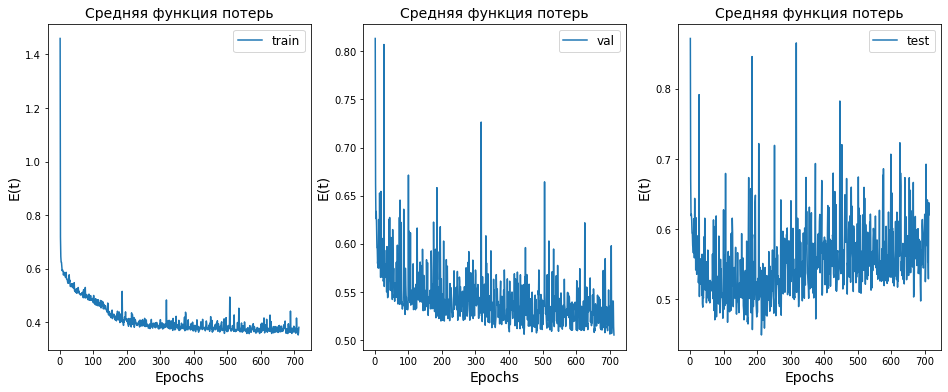

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

ax1.plot(errors1['epochs'], errors1['train'], label='train')
ax2.plot(errors1['epochs'], errors1['val'],   label='val')
ax3.plot(errors1['epochs'], errors1['test'],  label='test')

ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('E(t)',   fontsize=14)
ax1.set_title('Средняя функция потерь', fontsize=14)

ax1.legend(fontsize=12)


ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('E(t)',   fontsize=14)
ax2.set_title('Средняя функция потерь', fontsize=14)

ax2.legend(fontsize=12)


ax3.set_xlabel('Epochs', fontsize=14)
ax3.set_ylabel('E(t)',   fontsize=14)
ax3.set_title('Средняя функция потерь', fontsize=14)

ax3.legend(fontsize=12)

plt.savefig(f"./Graphs/Errors_1.jpg")

plt.show()

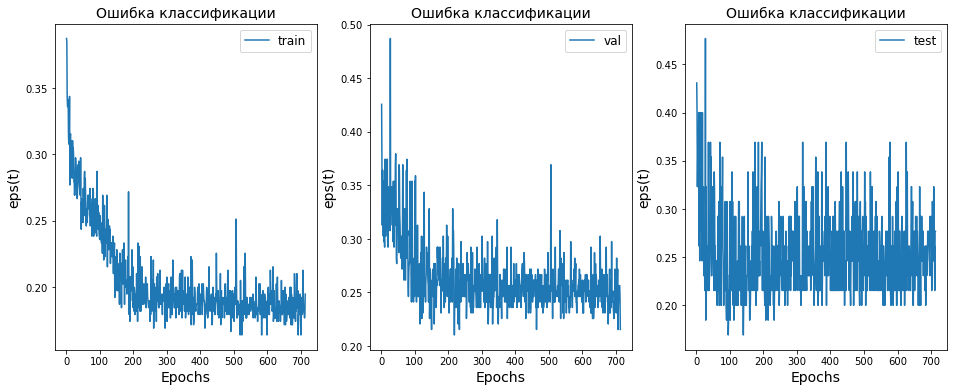

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

ax1.plot(errors1['epochs'], errors1['cls_train'], label='train')
ax2.plot(errors1['epochs'], errors1['cls_val'],   label='val')
ax3.plot(errors1['epochs'], errors1['cls_test'],  label='test')

ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('eps(t)',   fontsize=14)
ax1.set_title('Ошибка классификации', fontsize=14)

ax1.legend(fontsize=12)


ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('eps(t)',   fontsize=14)
ax2.set_title('Ошибка классификации', fontsize=14)

ax2.legend(fontsize=12)



ax3.set_xlabel('Epochs', fontsize=14)
ax3.set_ylabel('eps(t)',   fontsize=14)
ax3.set_title('Ошибка классификации', fontsize=14)

ax3.legend(fontsize=12)



plt.savefig(f"./Graphs/Errors_2.jpg")

plt.show()

#### Визуализация

<!-- from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/USArrests.csv')

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show() -->

In [32]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1
    y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

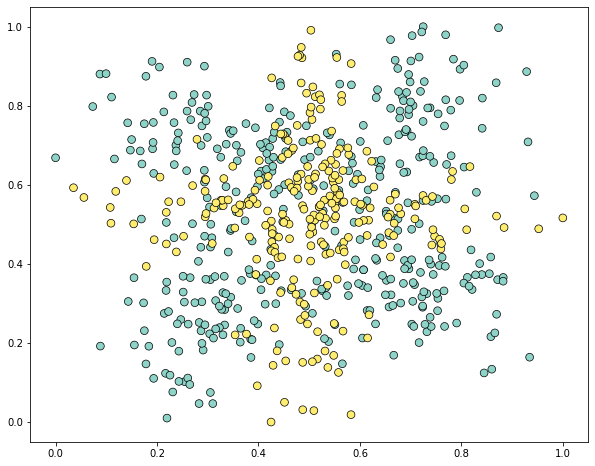

In [33]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=Y, s=60,
           cmap='Set3', edgecolors='black', linewidth=0.7)

In [34]:
XX, YY = get_grid(X_norm)

In [35]:
predicted = model1.predict(np.c_[XX.ravel(), YY.ravel()])
predicted = [0 if probs[0] > 0.5 else 1 for probs in predicted]
predicted = np.asarray(predicted).reshape(XX.shape)

<ipython-input-36-888409a6f97d>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, predicted, cmap='Set3')


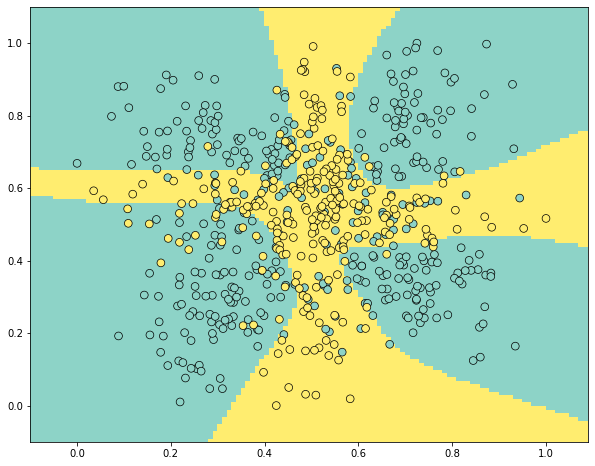

In [36]:
plt.pcolormesh(XX, YY, predicted, cmap='Set3')
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=Y, s=60,
           cmap='Set3', edgecolors='black', linewidth=0.7)

plt.savefig(f"./Graphs/Model_classification.jpg")

plt.show()